**At the edge**
<br>
<br>
The Filter window falls off the edge of the image.
<br>
Need to extrapolate the image.
<br>
<br>
1. BORDER_REPLICATE
2. BORDER_REFLECT
3. BORDER_REFLECT_101
4. BORDER_WRAP
5. BORDER_CONSTANT


**Sharpening**
<br>
<br>
Original - Smoothed(Low Pass Image) = High Pass Image(Edges)
<br>
Original + alpha(Original-Smoothed) = Sharpened Original Image

**Box Filter vs Gaussian Filter**
<br>
<br>
Box Filtering - Box filtering, also known as average filtering, involves replacing each pixel in the image with the average value of its neighboring pixels within a specified window (kernel) size.
<br>
               Simple, Suitable for general smoothing, can cause blocky edges and is not as effective at preserving edges.
<br>
<br>
Gaussian Filtering - Gaussian filtering applies a Gaussian function to the image, which weights pixels based on their distance from the center of the kernel. The closer a pixel is to the center of the kernel, the more influence it has on the new pixel value.
<br>
<br>
*Kernal for gaussian filtering*
<br>
$$
G(x, y) = \frac{1}{2 \pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

<br>
<br>
            More computationally complex
            The degree of smoothing can be controlled by adjusting the standard deviation 𝜎.
            produces a smoother result that preserves edges

<br>
<br>
<table>
  <tr>
    <th>Aspect</th>
    <th>Box Filtering</th>
    <th>Gaussian Filtering</th>
  </tr>
  <tr>
    <td>Kernel</td>
    <td>Uniform values (equal weights)</td>
    <td>Gaussian function (distance-based weights)</td>
  </tr>
  <tr>
    <td>Computation</td>
    <td>Simple, less computationally intensive</td>
    <td>More complex, computationally intensive</td>
  </tr>
  <tr>
    <td>Edge Preservation</td>
    <td>Poor, can cause blocky edges</td>
    <td>Better, maintains edges more effectively</td>
  </tr>
  <tr>
    <td>Smoothing Effect</td>
    <td>Uniform smoothing</td>
    <td>Distance-based smoothing, smoother results</td>
  </tr>
  <tr>
    <td>Control Parameters</td>
    <td>Kernel size</td>
    <td>Kernel size and standard deviation &sigma;</td>
  </tr>
</table>



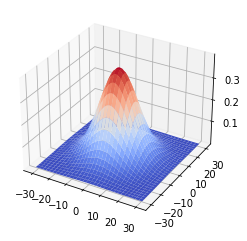

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma +1
x = np.linspace(-hw, hw, 2*hw+1)
y = np.linspace(-hw, hw, 2*hw+1)

X, Y = np.meshgrid(x, y)
# print(X)
# print(Y)

G = 1/np.sqrt(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, G, cmap='coolwarm')
plt.show()



**Seperability of the Gaussian Filter**
<br>
<br>
The 2D Gaussian can be expressed as the product of two functions, one a function of X and the other a function of Y.
<br>
In this case, the two Gaussian are the (identical) 1-D Gaussians.
<br>
Seperability means that a 2-D convolution can be reduced to two 1-D convolutions(one among rows and one among columns).
<br>
What is the complexity of filtering an *n* * *n* image with an *m* * *m* kernal?
<br>
$$O(n^{2}m^{2})$$
<br>


What is the comlexity if the kernal is seperable?
<br>
$$O(n^{2}m)$$



$$ n^{2}m + n^{2}m $$

<br>
Computational cost is reduced


In [9]:
#1-D Gaussian of length 5 with sigma = 1

sigma = 1
hw = 2
x = np.linspace(-hw, hw, 2*hw+1)


g = 1/np.sqrt((2*np.pi)) * np.exp(-(x**2 )/(2*sigma**2))

g

array([0.05399097, 0.24197072, 0.39894228, 0.24197072, 0.05399097])

In [10]:
#Outer product between two 1-D Gaussians
G = np.outer (g,g)

G

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [12]:
#3x3 Sobel Kernal
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]])

print(sobel_x)

b = np.array([-1, 0, 1])
a = np.array([1, 2, 1])
sobel_x = np.outer(a, b)

print(sobel_x)


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


$$ Edges, Corners, Blobs $$

**Edge Detection**
<br>
<br>
Goal : Identify sudden changes (discontinuities) in an image.
<br>
* Intuitively, most semantic and shape information from the image can be encoded in the edges.
<br>
* More campact than pixels.


**Image Gradiant**
<br>
<br>
$$
\nabla I = \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right)
$$
<br>
In a constant intensity area grafiant is zero.

In [13]:
G /= np.sum(G)